# Univariate Resemblance Analysis (URA) Dataset B
In this notebook the univariate resemblance analysis of Dataset B is performed for all STDG approaches.

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/B_Cardio_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/B_Cardio_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/B_Cardio_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/B_Cardio_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':           id    age gender  height  weight  ap_hi  ap_lo cholesterol gluc  \
 0      67617  21876      1     154    80.0    130     90           2    1   
 1      96320  16717      2     162    70.0    140     90           1    1   
 2      17571  21128      2     174    92.0    150    100           1    1   
 3      46492  23366      2     173    76.0    120     82           1    1   
 4        945  20281      1     160    60.0    120     80           1    1   
 ...      ...    ...    ...     ...     ...    ...    ...         ...  ...   
 55995  53137  16001      2     170    75.0    150     80           1    1   
 55996   8918  23209      2     162    73.0    160     90           1    1   
 55997  78302  23589      1     169    74.0    120     80           1    1   
 55998   1197  18227      1     167    70.0    120     80           1    1   
 55999  22556  15114      2     177    64.0    120     80           1    1   
 
       smoke alco active cardio  
 0         0    0   

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
id,49971.93 ± 28875.38,50024.3 ± 28906.75,50125.81 ± 28910.35,55598.98 ± 29048.61,54047.98 ± 6608.43
age,19464.93 ± 2469.4,19473.06 ± 2481.06,19460.5 ± 2475.42,19519.06 ± 2072.39,17968.31 ± 319.82
height,164.35 ± 8.19,163.86 ± 8.21,164.32 ± 8.15,164.81 ± 6.66,165.26 ± 0.73
weight,NaN,NaN,NaN,NaN,NaN
ap_hi,74.19 ± 14.36,74.21 ± 14.47,74.35 ± 14.35,75.47 ± 13.96,90.44 ± 6.94
ap_lo,128.74 ± 148.35,123.73 ± 20.05,129.54 ± 148.72,122.48 ± 15.13,127.32 ± 9.76


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
id,7.6166e-01,0.3728,8.9586e-231,1.6858e-231
age,5.8259e-01,0.7642,7.0920e-05,0.0000e+00
height,2.0515e-23,0.6270,3.0085e-25,1.9215e-150
weight,8.3426e-01,0.0626,9.3905e-52,0.0000e+00
ap_hi,2.5442e-15,0.3649,3.0274e-23,2.3898e-02
ap_lo,4.3220e-01,0.3880,2.2444e-01,1.5903e-20


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
id,3.8153e-01,1.9064e-01,3.6241e-233,5.7310e-125
age,2.7865e-01,1.5574e-11,4.7324e-01,0.0000e+00
height,1.1215e-27,4.3854e-01,2.2703e-22,1.2216e-180
weight,4.9188e-01,3.3935e-38,2.6624e-48,0.0000e+00
ap_hi,8.3802e-59,2.2907e-05,0.0000e+00,1.0699e-195
ap_lo,5.6298e-06,1.1486e-32,0.0000e+00,0.0000e+00


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
id,9.6395e-01,1.8673e-86,0.0000e+00,0.0
age,1.4074e-07,1.4681e-92,1.5949e-250,0.0
height,1.5042e-41,3.3188e-25,1.9705e-88,0.0
weight,1.3746e-22,1.6097e-171,3.6300e-161,0.0
ap_hi,0.0000e+00,0.0000e+00,0.0000e+00,0.0
ap_lo,0.0000e+00,0.0000e+00,0.0000e+00,0.0


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
id,0.7617,0.3728,0.0000,0.0000,0.3815,0.1906,0.0000,0.0,0.9639,0.0,0.0,0.0
age,0.5826,0.7642,0.0001,0.0000,0.2786,0.0000,0.4732,0.0,0.0000,0.0,0.0,0.0
height,0.0000,0.6270,0.0000,0.0000,0.0000,0.4385,0.0000,0.0,0.0000,0.0,0.0,0.0
weight,0.8343,0.0626,0.0000,0.0000,0.4919,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
ap_hi,0.0000,0.3649,0.0000,0.0239,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0
ap_lo,0.4322,0.3880,0.2244,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
gender,0.7363,0.5157,0.2637,1.0000
cholesterol,0.5254,0.8011,0.6451,0.0540
gluc,0.4552,0.0900,0.1202,0.9678
smoke,0.8887,0.8493,0.9203,1.0000
alco,0.8832,0.0120,0.0795,1.0000
active,0.6749,0.8734,0.7717,0.8233
cardio,0.9387,0.8490,0.5943,0.8286


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':            id     age  height  weight   ap_hi   ap_lo
 0      0.6762  0.8578  0.5077  0.3258  0.0191  0.0082
 1      0.9632  0.4583  0.5487  0.2697  0.0198  0.0082
 2      0.1757  0.7998  0.6103  0.3933  0.0205  0.0091
 3      0.4649  0.9731  0.6051  0.3034  0.0184  0.0075
 4      0.0095  0.7343  0.5385  0.2135  0.0184  0.0073
 ...       ...     ...     ...     ...     ...     ...
 55995  0.5314  0.4029  0.5897  0.2978  0.0205  0.0073
 55996  0.0892  0.9610  0.5487  0.2865  0.0212  0.0082
 55997  0.7830  0.9904  0.5846  0.2921  0.0184  0.0073
 55998  0.0120  0.5752  0.5744  0.2697  0.0184  0.0073
 55999  0.2256  0.3342  0.6256  0.2360  0.0184  0.0073
 
 [56000 rows x 6 columns],
 'GM':            id     age  height  weight   ap_hi   ap_lo
 0      0.0354  0.2724  0.5208  0.2760  0.3858  0.0142
 1      0.0867  0.8618  0.4688  0.2977  0.3775  0.0121
 2      0.2654  0.8745  0.4635  0.3111  0.3849  0.0152
 3      0.1613  0.6415  0.5260  0.3784  0.3709  0.0135
 4      0.3997  0.8266

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
id,96.7777,74.3351,95.0949,95.8356
age,62.1703,68.5057,72.6796,123.1080
height,14.6269,33.6541,41.2750,52.2932
weight,27.2086,63.3840,33.0082,51.0776
ap_hi,83.5431,118.7483,158.5648,82.6344
ap_lo,5.9916,117.1607,30.1213,101.4238


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
id,0.2508,0.1586,0.2280,0.2059
age,0.0732,0.0632,0.0994,0.1038
height,0.0059,0.0297,0.0427,0.0123
weight,0.0675,0.0587,0.1098,0.0879
ap_hi,0.1254,0.1481,0.1281,0.1837
ap_lo,0.7183,0.5723,0.8048,0.5705


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
id,0.0726,0.0559,0.0711,0.0527
age,0.0584,0.0477,0.0570,0.0441
height,0.0116,0.0218,0.0234,0.0276
weight,0.0138,0.0235,0.0137,0.0251
ap_hi,0.0027,0.0214,0.0144,0.0182
ap_lo,0.0027,0.0207,0.0172,0.0147


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
id,0.0008,0.1511,0.0496,0.2811
age,0.0293,0.1860,0.1275,0.4779
height,0.0147,0.0846,0.1158,0.1922
weight,0.0139,0.2275,0.0582,0.1371
ap_hi,0.3526,0.4874,0.6672,0.3232
ap_lo,0.0053,0.4804,0.0492,0.4175


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
id,0.2508,0.1586,0.2280,0.2059,0.0726,0.0559,0.0711,0.0527,0.0008,0.1511,0.0496,0.2811
age,0.0732,0.0632,0.0994,0.1038,0.0584,0.0477,0.0570,0.0441,0.0293,0.1860,0.1275,0.4779
height,0.0059,0.0297,0.0427,0.0123,0.0116,0.0218,0.0234,0.0276,0.0147,0.0846,0.1158,0.1922
weight,0.0675,0.0587,0.1098,0.0879,0.0138,0.0235,0.0137,0.0251,0.0139,0.2275,0.0582,0.1371
ap_hi,0.1254,0.1481,0.1281,0.1837,0.0027,0.0214,0.0144,0.0182,0.3526,0.4874,0.6672,0.3232
ap_lo,0.7183,0.5723,0.8048,0.5705,0.0027,0.0207,0.0172,0.0147,0.0053,0.4804,0.0492,0.4175


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

6

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

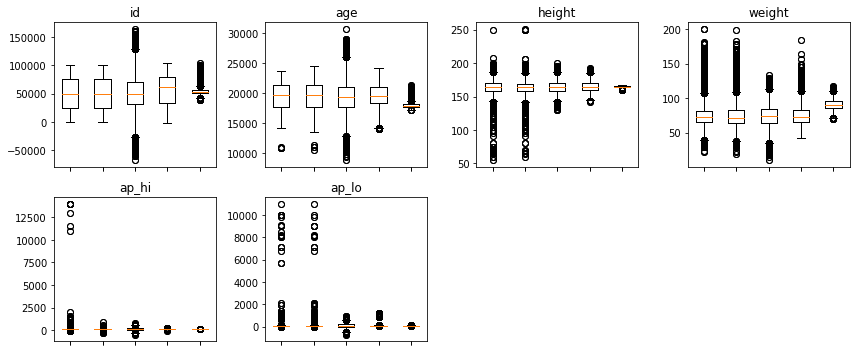

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,5))
idx = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1]]
idx = dict(zip(columns,idx))

for i in range(0,len(columns)) :
    ax = axs[idx[columns[i]][0], idx[columns[i]][1]]
    
    ax.boxplot(boxplots_data[columns[i]])
        
    ax.boxplot(boxplots_data[columns[i]])
    ax.set_title(columns[i])
    #ax.set_xticklabels(DATA_TYPES)
    
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
    
fig.delaxes(axs[1,2])
fig.delaxes(axs[1,3])
fig.tight_layout()

fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [21]:
columns = data['Real'].columns
len(columns)

13

In [22]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

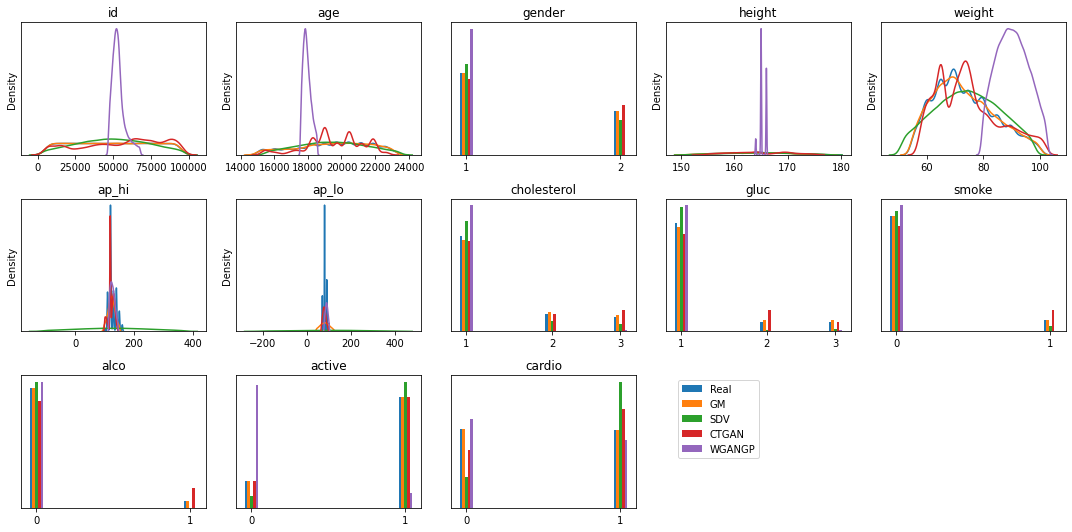

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15,3*2.5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3], 9:[1,4], 10:[2,0], 11:[2,1], 12:[2,2]}

for i in range(0,len(columns)) :
    ax = axs[idx[i][0], idx[i][1]]
    ax.set_title(columns[i])
    
    if i in [0, 1, 3, 4, 5, 6] :
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]) :
            arr_col = np.sort(arr[:,col])
            sns.distplot(arr_col[int(0.05*len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax)
            
    else :
        ax.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
        
    if columns[i] == 'gender' :
        ax.set_xticks([1.05, 1.95])
        ax.set_xticklabels([1, 2])
        
    elif columns[i] in ['cholesterol','gluc'] :
        ax.set_xticks([1.1, 2.1, 2.9])
        ax.set_xticklabels([1, 2, 3])
        
    elif columns[i] in ['alco','smoke','active','cardio'] :
        ax.set_xticks([0.05, 0.95])
        ax.set_xticklabels([0,1])
        
    ax.set_yticks([])
    
fig.delaxes(axs[2,3])
fig.delaxes(axs[2,4])
fig.tight_layout()
axs.ravel()[12].legend(bbox_to_anchor=(1.2,1),bbox_transform=axs.ravel()[12].transAxes)
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')